# <font color=blue> Classification of Credit Card Default

## <font color = red>Using Machine Learning to classify default risk 

### <font color = green> By Daniel Baumann

### The Task
Using a dataset found on UCI Machine Learning Repository, my task was to correctly classify individuals to default on their credit cards.

The dataset looks at 30,000 individuals in Taiwan and has 23 explanatory variables, with one target variable of default.

Please see below for an overview and description of each of these variables:

|Name |	Description |
|-----------|-------------|
|ID	|ID of each client|
|limit_balance| 	Amount of given credit in NT dollars (includes individual and family/supplementary credit)|
|sex|	Gender (1=male, 2=female)|
|education|	(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)|
|marriage	|Marital status (1=married, 2=single, 3=others)|
|age|	Age in years|
|pay_stat_sep|	Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)|
|pay_stat_aug	|Repayment status in August, 2005 (scale same as above)|
|pay_stat_jul	|Repayment status in July, 2005 (scale same as above)|
|pay_stat_jun	|Repayment status in June, 2005 (scale same as above)|
|pay_stat_may	|Repayment status in May, 2005 (scale same as above)|
|pay_stat_apr	|Repayment status in April, 2005 (scale same as above)|
|bill_amt_sep	|Amount of bill statement in September, 2005 (NT dollar)|
|bill_amt_aug	|Amount of bill statement in August, 2005 (NT dollar)|
|bill_amt_jul	|Amount of bill statement in July, 2005 (NT dollar)|
|bill_amt_jun	|Amount of bill statement in June, 2005 (NT dollar)|
|bill_amt_may	|Amount of bill statement in May, 2005 (NT dollar)|
|bill_amt_apr	|Amount of bill statement in April, 2005 (NT dollar)|
|pay_amt_sep	|Amount of previous payment in September, 2005 (NT dollar)|
|pay_amt_aug	|Amount of previous payment in August, 2005 (NT dollar)|
|pay_amt_jul	|Amount of previous payment in July, 2005 (NT dollar)|
|pay_amt_jun	|Amount of previous payment in June, 2005 (NT dollar)|
|pay_amt_may	|Amount of previous payment in May, 2005 (NT dollar)|
|pay_amt_apr	|Amount of previous payment in April, 2005 (NT dollar)|
|default_next_month	|Default payment (1=yes, 0=no)|

## Table of Contents

* __Part 1.__ Discussion of Default Risk
* __Part 2.__ Data Cleaning
* __Part 3.__ Exploratory Data Analysis
  * 3.1 *Limit Balance*
  * 3.2 *Sex*
  * 3.3 *Education*
  * 3.4 *Marriage*
  * 3.5 *Age*
  * 3.6 *Payment status, bill amount & pay amount*
* __Part 4.__ Predictive Modelling
  * 4.1 *Synthetic Minority Oversampling Technique*
  * 4.2 *Logistic Regression*
  * 4.3 *Support Vector Machines*
    * 4.3.1 *Linear SVM*
    * 4.3.2 *Polynomial SVM*
  * 4.4 *Decision Tree Classifier*
  * 4.5 *Random Forest Classifier* 
  * 4.6 *Voting Classifier*
* __Part 5.__ Conclusion & Evaluation

## <font color = darkred>Part 1. Discussion of Default Risk

__*What is default?*__

Default typically occurs when an individual is unable to make sufficient payments to pay for his/her debt on a given due date. This is often rated as inability to pay for 6/9 months of debt

__*Why is it important?*__

It is incredibly costly for any lending society to have customers which default. It represents a large sunk cost which is hard to get back. For this reason, it is in the interest of these establishments to correctly identify individuals who are likely to default, so that they raise interest rates, or refuse to offer credit entirely

__*Interpretations of classification*__

Binary classification of this sort can have four specific outcomes.
In cases such as credit default we can make the following interpretations from our results:

THESE ARE OUR DESIRABLE PREDICTIONS:
* True Positive: Correctly identifying those who will default on credit
* True Negative: Correctly identifying those who will not default on credit

UNDESIRABLE PREDICTIONS:
* False Positive: Incorrectly identifying an individual who will not default, as a defaulter
* False Negative: Unable to identify those who will actually default

__*False Positive or False Negative?*__

Classification often comes with a reptitive question. Are false positive or false negatives more costly?

If not already obvious, it is clear that the cost of false negatives in this scenario are far greater (in monetary terms) than false positives. Inability to identify defaulters would result in large costs to banks or lending societies.

For this reason, my analysis will focus on achieiving a high recall score. Recall is an evaluation metric often used in classification methods.

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$ 

In this case, recall can be interpreted as:

"Out of all individuals we saw as actually having defaulted, what percentage of them did our model correctly identify as defaulting?"

## <font color = darkred>Part 2. Data Cleaning

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# importing the data cleaning library
import datacleaning as dc

# cleaning the data
df = dc.data_clean('default of credit card clients.xls')

# inspecting the head
display(df.head())

# inspecting the length of the dataset
print("There are {} observations and {} variables".format(df.shape[0], df.shape[1]))

,limit_balance,sex,education,marriage,age,pay_status_sep,pay_status_aug,pay_status_jul,pay_status_jun,pay_status_may,...,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_sep,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,default_next_month
0,20000,female,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


There are 30000 observations and 24 variables


Data cleaning included:

* Renaming columns to more recognisable Python syntax
* Dropping ID column as this is irrelevant to the task
* Replacing numbers in sex to strings (we will dummy these later)
* Changing education values of 5, 6 to median education value
* Replacing the handful of marriage values of 0 to 3 (other)

## <font color = darkred>Part 3. Exploratory Data Analysis

### <font color = darkblue>3.1 Limit Balance

Distribution plots which compare the limit balance between those who defaulted and those who did not default may give us an idea as to which group tends to default more

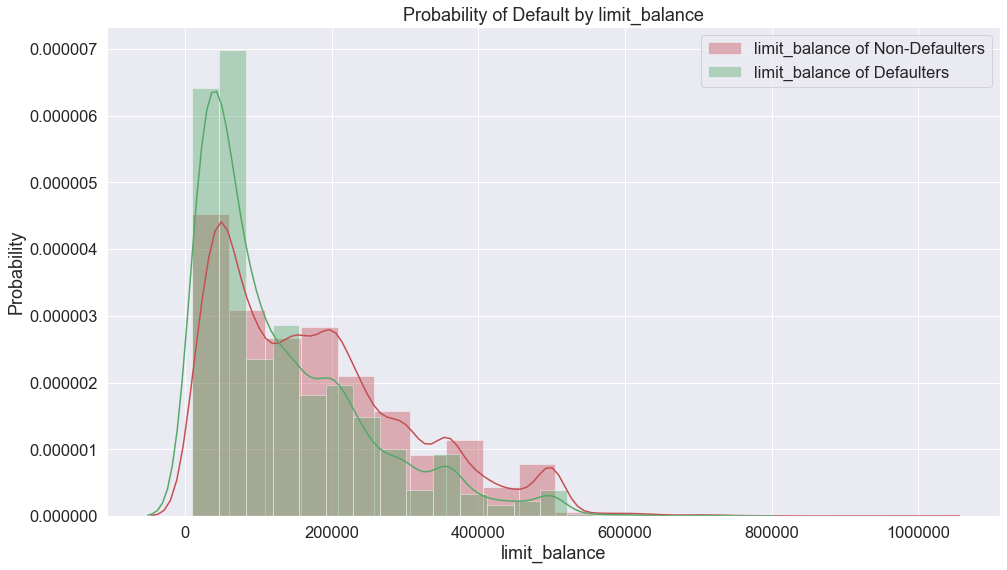

In [87]:
# importing functions library
import visualizations as vz

vz.distplot(variable_name = 'limit_balance', data = df)


In [4]:
# As seen in the diagram above, it appears that those who default are
# more likely to have lower credit balance
# this may be a useful predictor in our modelling

### <font color = darkblue>3.2 Sex

In [8]:
# it may be interesting to see the differences in defaults amongst 
# male and female
import functions as fn

# here we have a function that calculates the default rate
# requires a dataframe, variable name, and boolean answers
fn.default_rate(data = df, variable_name = 'sex', boolean = ['male','female'])

male Default rate is : 0.24
female Default rate is : 0.21


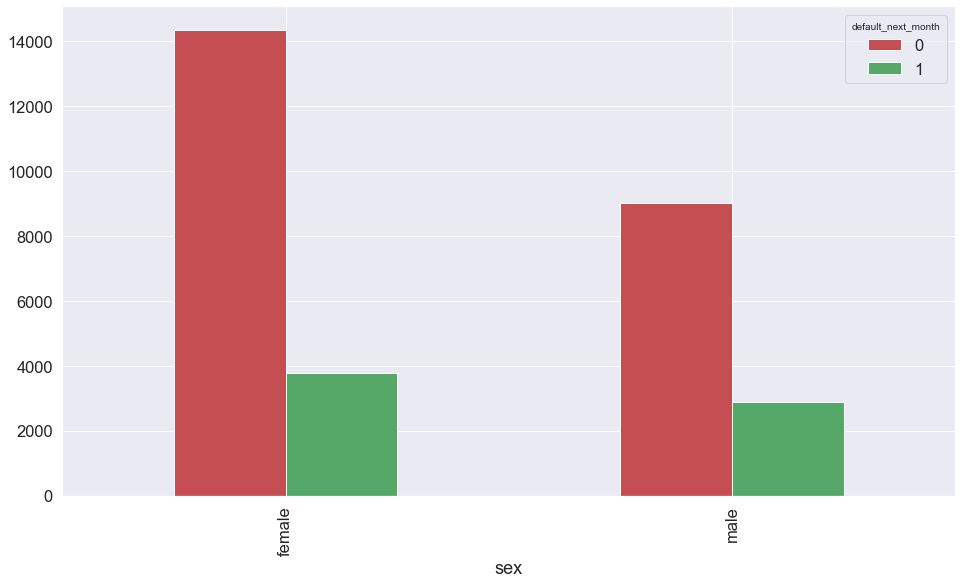

In [9]:
# a visualization on the proportion of each gender that defaults
vz.bar_plot(variable_name = 'sex', data = df)

In [10]:
# Males defaulting more may also be useful as a predictor in our modelling

### <font color = darkblue>3.3 Education

In [11]:
df.education.value_counts()

2    14375
1    10585
3     4917
4      123
Name: education, dtype: int64

In [12]:
education = [1,2,3,4]
fn.default_rate(data = df, variable_name = 'education', boolean = education)
# Those who went to graduate school defaulted less than those 
# who finished their education at university and high school

1 Default rate is : 0.19
2 Default rate is : 0.23
3 Default rate is : 0.25
4 Default rate is : 0.06


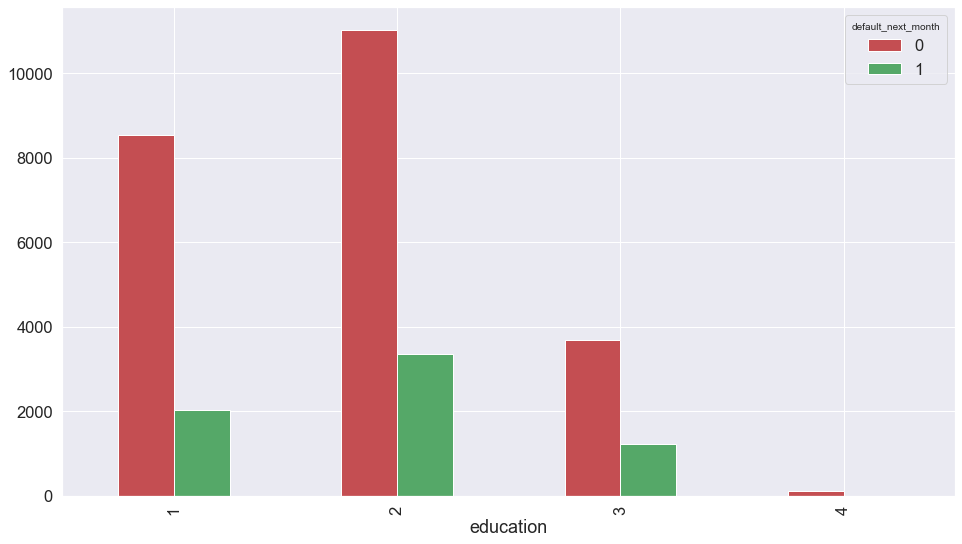

In [13]:
vz.bar_plot(variable_name = 'education', data = df)

### <font color = darkblue>3.4 Marriage

In [14]:
# There may also be differences in default rates amongst married
# and singles
# Perhaps in marriage there is more transfer of wealth and security
marriage = [1,2,3]
fn.default_rate(data = df, variable_name = 'marriage', boolean = marriage)

1 Default rate is : 0.23
2 Default rate is : 0.21
3 Default rate is : 0.24


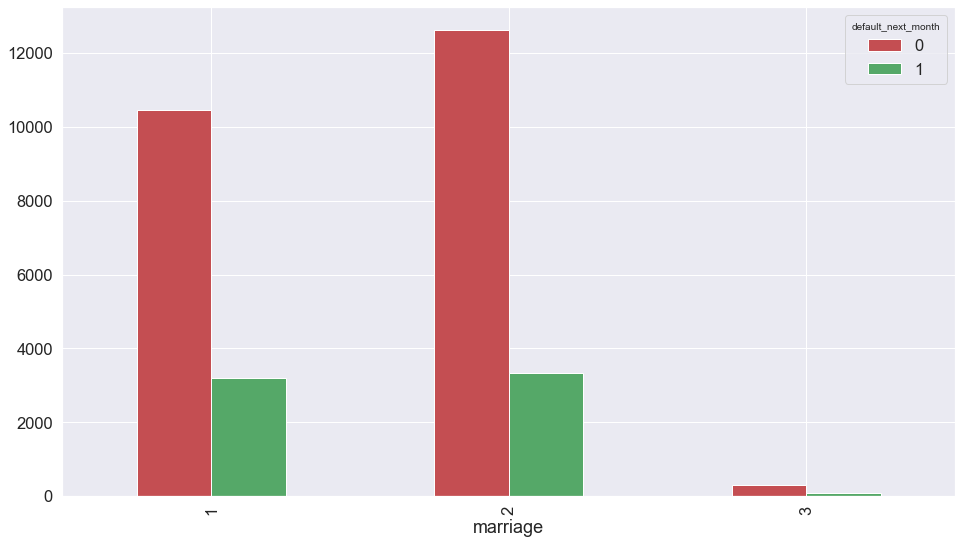

In [15]:
# single people seem to have a higher default rate than married people
vz.bar_plot(variable_name = 'marriage', data =df)

### <font color = darkblue>3.5 Age

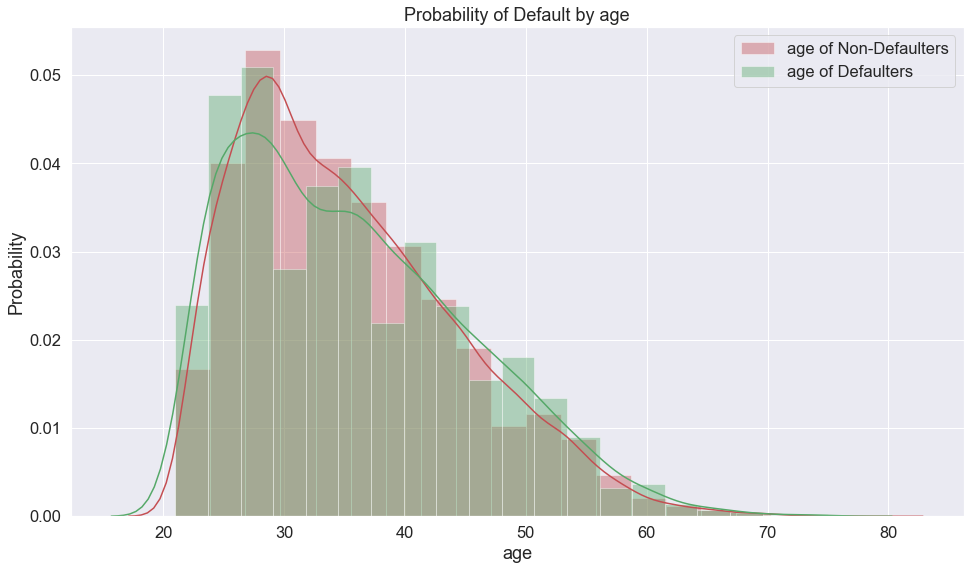

In [16]:
# Credit default may also be related to the age of individuals
vz.distplot(variable_name = 'age', data = df)

In [17]:
# it seems like young people between ages 20-27 are slightly
# more likely to default
# also for 45+

### <font color = darkblue>3.6 Payment status, bill amount and pay amount

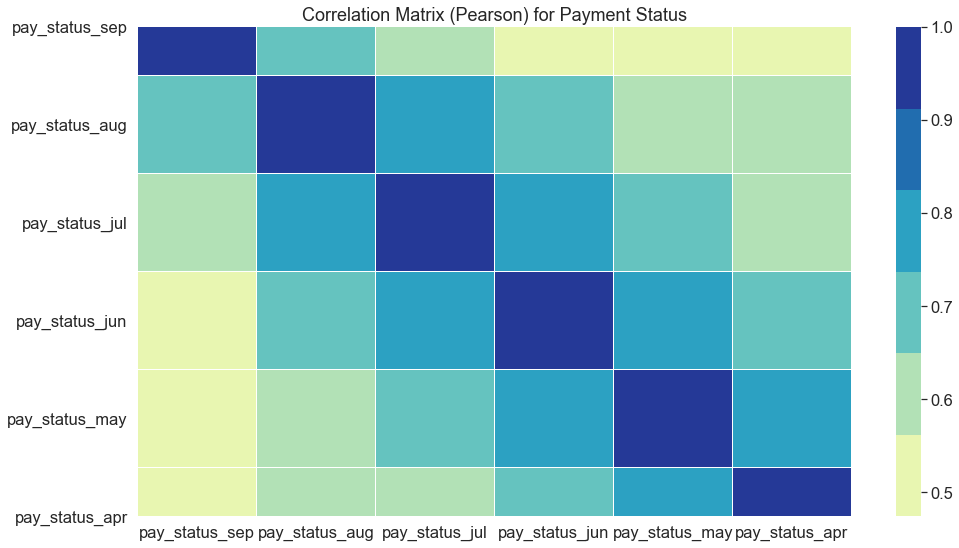

In [18]:
var = df.columns[5:11]
vz.correlation_matrix(data = df, columns = var, type_of_variables = 'Payment Status')

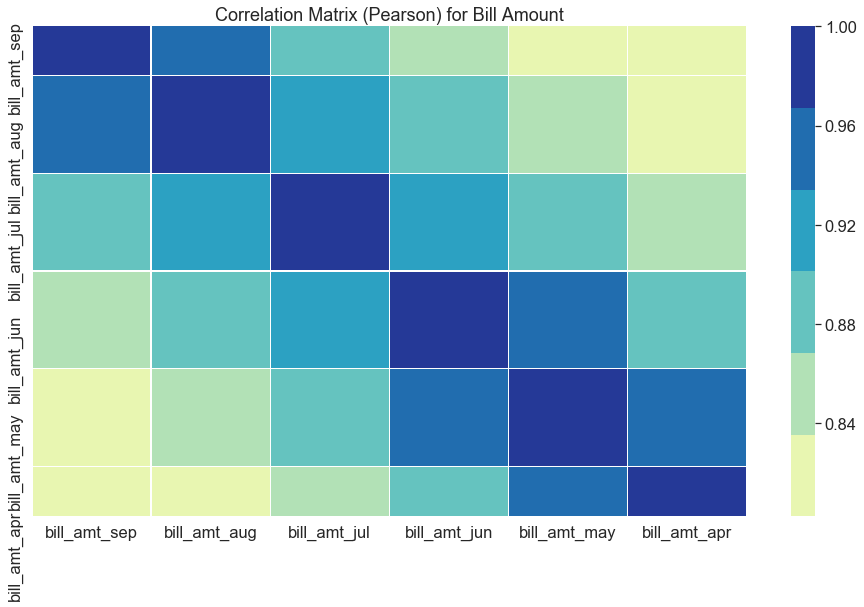

In [19]:
var = df.columns[11:17]
vz.correlation_matrix(data = df, columns = var, type_of_variables = 'Bill Amount')

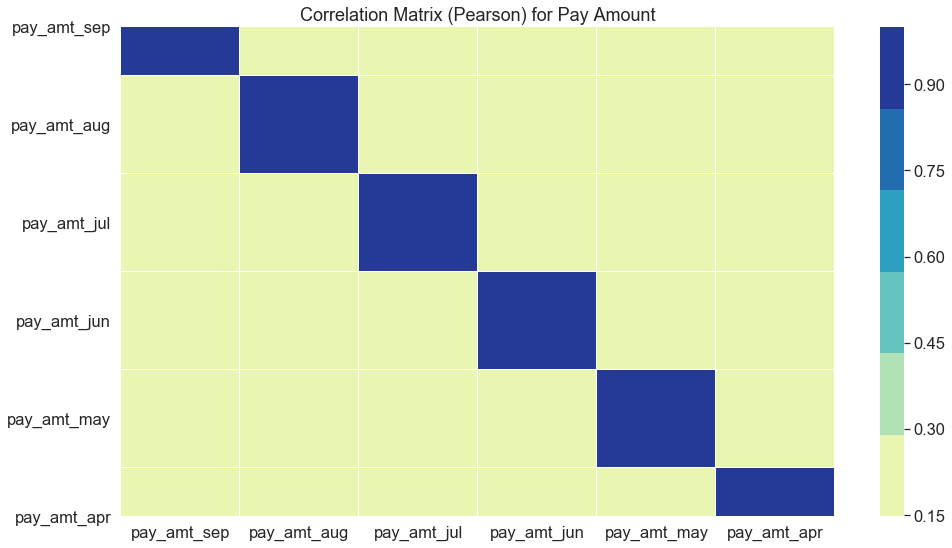

In [20]:
var = df.columns[17:23]
vz.correlation_matrix(data = df, columns = var, type_of_variables = 'Pay Amount')

For payment status and bill amount, correlation seems to fall off after a few months.

For this reason as well as computational limitations, I will drop months April to July, as well as getting dummy variables for payment status, sex, education, marriage. 

In [21]:
df = dc.get_dummies(df)
df = dc.del_months(df)

## <font color = darkred> Part 4. Predictive Modelling

#### Setting up the data

In [22]:
import numpy as np
# Setting up our predictors (X) and target variable (y)
X = np.array(df.drop(columns = 'default_next_month'))
y = np.array(df['default_next_month']).reshape(-1, 1)

# Also need to scale our data. I will use sklearn's StandardScaler
from sklearn.preprocessing import StandardScaler
# instatiate standard scaler
ss = StandardScaler()
# and standardize the data
X = ss.fit_transform(X)

# splitting the data into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123, shuffle = True)

### <font color = darkblue>4.1 Synthetic Minority Oversampling Technique

In [23]:
A = df.default_next_month.value_counts()[1]
print("There are {} defaulters out of a possible 30000".format(A))

There are 6636 defaulters out of a possible 30000


As there is a huge class imbalance between defaulters and non-defaulters, we can use sampling techniques to correct for this

In my predictive modelling I have elected to use Synthetic Minority Oversampling Technique

Under the hood, the SMOTE algorithm works in 4 simple steps:

* Choose a minority class input vector
* Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
* Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
* Repeat the steps until data is balanced

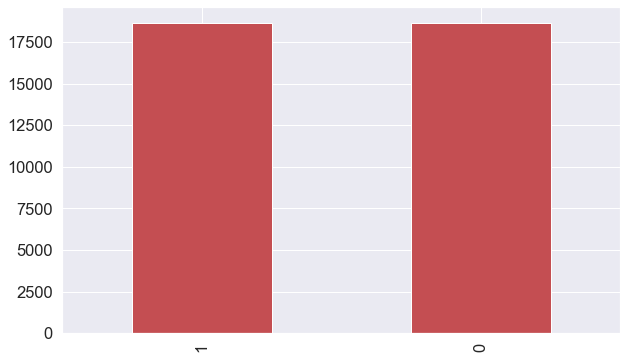

In [25]:
# importing SMOTE from imblearn
from imblearn.over_sampling import SMOTE
import pandas as pd
# instantiating SMOTE
smote = SMOTE(random_state=123)

# using SMOTE on the data
X_train, y_train = smote.fit_sample(X_train, y_train.ravel())

# and can see a visualisation of our now balanced class
pd.Series(y_train).value_counts().plot.bar(color = 'r', figsize = (10,6));

### <font color = darkblue>4.2 Logistic Regression

Logistic regression is a binary classifier which models based on the probability that a certain event will occur

In [37]:
# training the model
fpr, tpr, thresh, y_score = fn.logistic_regression(X_train, y_train, X_test, y_test) 

Optimal penalisation paramter is C = 7.742636826811269

Recall for test set is: 0.558282208588957

AUC is :0.76

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,3936,760,4696
1,576,728,1304
All,4512,1488,6000


__Plotting a ROC Curve__

AUC: 0.7623062735809618


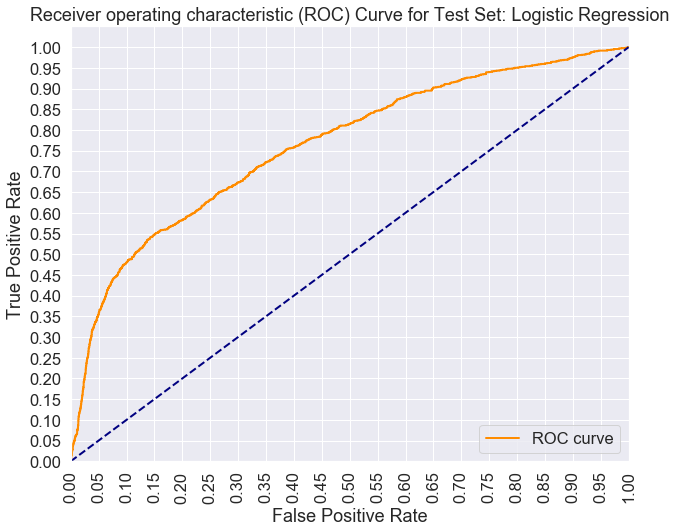

In [38]:
fn.plot_roc_curve(fpr, tpr, classifier_name = 'Logistic Regression')

__Plotting a Precision Recall Curve__

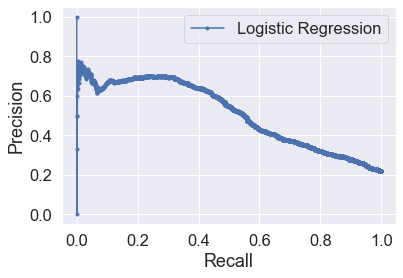

In [40]:
precision, recall, thresh = fn.plot_precision_recall_curve(y_test, proba = y_score, classifier_name = 'Logistic Regression')

__Plotting a Precision Recall Threshold__

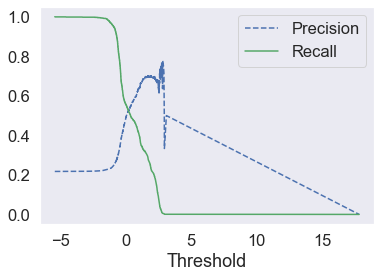

In [41]:
fn.plot_precision_recall_threshold(precision, recall, thresholds = thresh)

In [42]:
# this model is bad

### <font color = darkblue>4.3 Support Vector Machines

#### <font color = purple>4.3.1 Linear SVM

In [44]:
# training the model
fpr, tpr, thresh, y_score = fn.linear_svm(X_train, y_train, X_test, y_test)


Recall for test set is: 0.5276073619631901

AUC is :0.68

Confusion Matrix
----------------


AUC: 0.6849968907097542


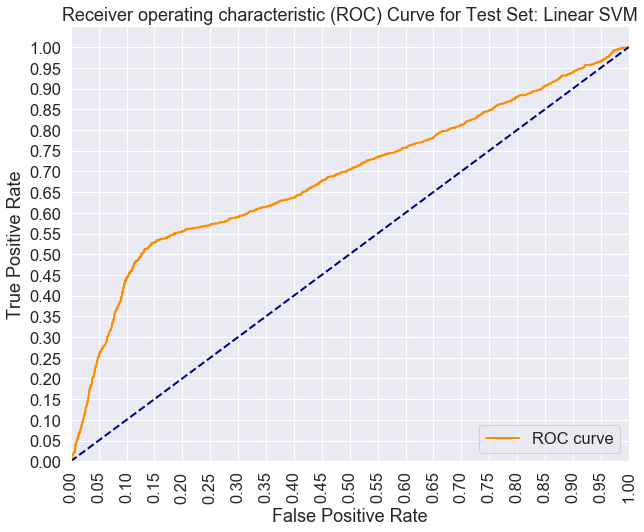

In [47]:
fn.plot_roc_curve(fpr, tpr, classifier_name = 'Linear SVM')

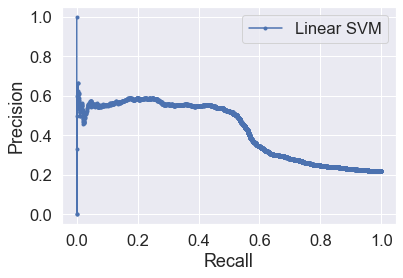

In [50]:
precision, recall, thresh = fn.plot_precision_recall_curve(y_test, proba = y_score, classifier_name = 'Linear SVM')

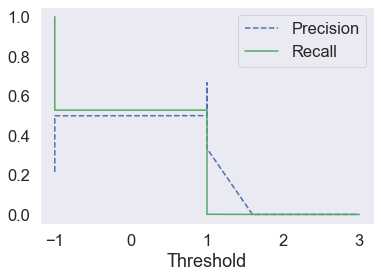

In [51]:
fn.plot_precision_recall_threshold(precision, recall, thresholds = thresh)

#### <font color = purple>4.3.2 Polynomial SVM

In [53]:
fpr, tpr, thresholds, y_score = fn.poly_svm(X_train, y_train, X_test, y_test)

Optimal penalisation paramter is C = 0.01, and optimal gamma is = 1

Recall for test set is: 1.0

AUC is :0.51

Confusion Matrix
----------------


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Predicted,0,1,All
True,,,
0,7,4689,4696
1,0,1304,1304
All,7,5993,6000


AUC: 0.5101041318286808


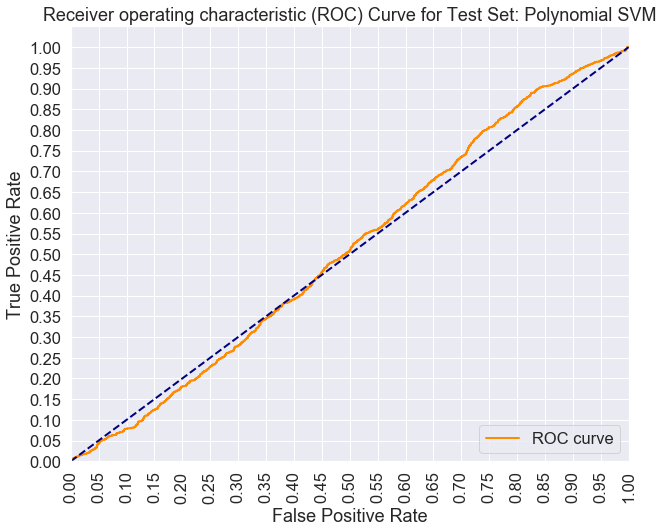

In [54]:
fn.plot_roc_curve(fpr, tpr, classifier_name = 'Polynomial SVM')

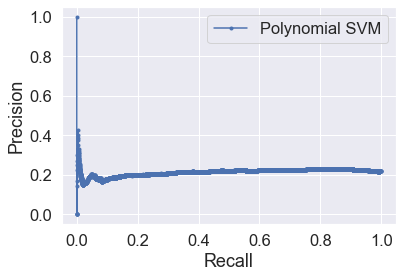

In [55]:
precision, recall, thresh = fn.plot_precision_recall_curve(y_test, proba = y_score, classifier_name = 'Polynomial SVM')

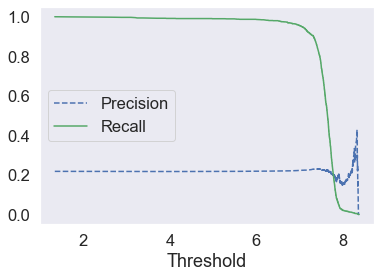

In [56]:
fn.plot_precision_recall_threshold(precision, recall, thresholds = thresh)

### <font color = darkblue>4.4 Decision Tree 

In [71]:
fpr, tpr, thresholds, proba = fn.tree_clf(X_train, y_train, X_test, y_test)

Optimal max depth paramter is = 8, and optimal min samples leaf is = 15

Recall for test set is: 0.5521472392638037

AUC is :0.74

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,3906,790,4696
1,584,720,1304
All,4490,1510,6000


AUC: 0.7407926469204962


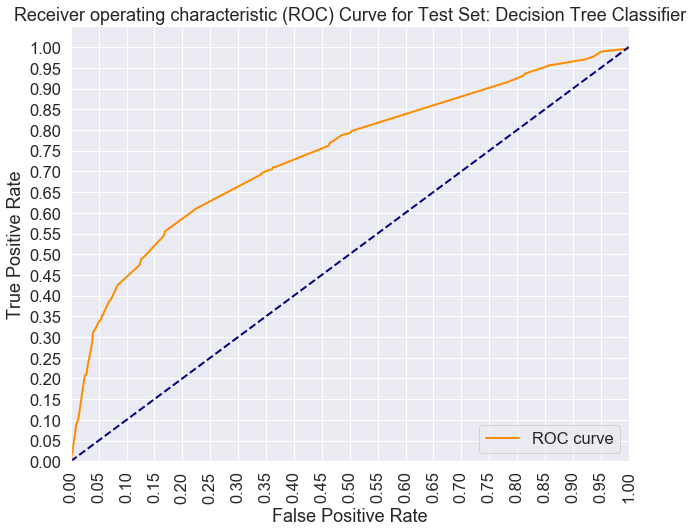

In [72]:
fn.plot_roc_curve(fpr, tpr, classifier_name = 'Decision Tree Classifier')

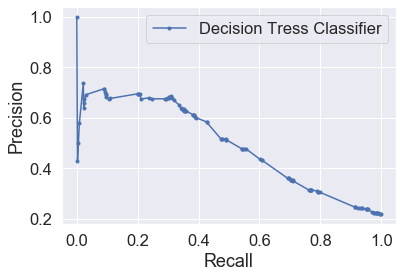

In [73]:
precision, recall, thresh = fn.plot_precision_recall_curve(y_test, proba, classifier_name = 'Decision Tress Classifier')

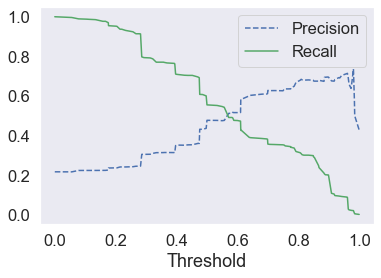

In [74]:
fn.plot_precision_recall_threshold(precision, recall, thresholds = thresh)

### <font color = darkblue>4.5 Random Forest 

In [78]:
fpr, tpr, thresholds, proba = fn.random_forest(X_train, y_train, X_test, y_test)

Recall for test set is: 0.5567484662576687

AUC is :0.77

Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,3960,736,4696
1,578,726,1304
All,4538,1462,6000


AUC: 0.7713457511156865


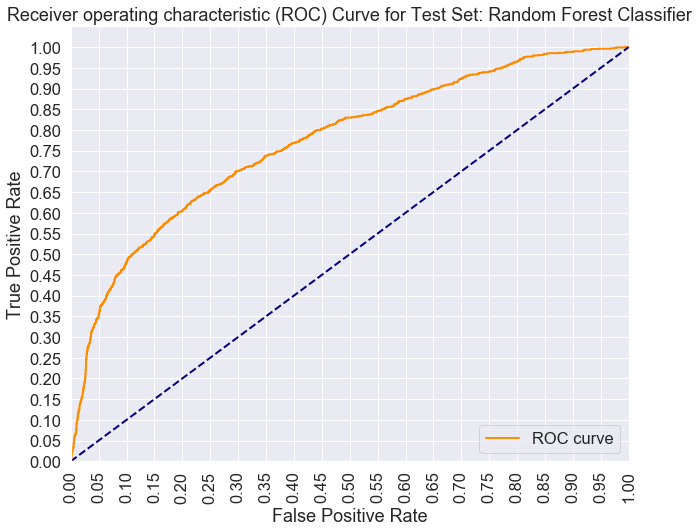

In [79]:
fn.plot_roc_curve(fpr, tpr, classifier_name = 'Random Forest Classifier')

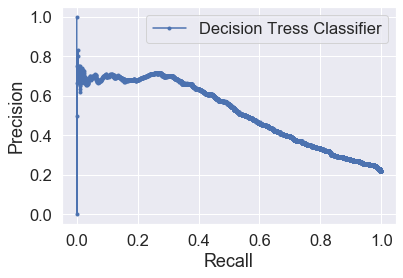

In [80]:
precision, recall, thresh = fn.plot_precision_recall_curve(y_test, proba, classifier_name = 'Decision Tress Classifier')

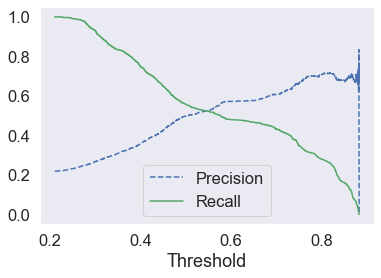

In [83]:
fn.plot_precision_recall_threshold(precision, recall, thresholds = thresh)

### <font color = darkblue>4.6 Voting Classifier 

In [86]:
fpr, tpr, thresholds, proba = fn.Voting_Classifier(X_train, y_train, X_test, y_test)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 0.7773333333333333


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier 0.772


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.7823333333333333


/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.7886666666666666
Recall for test set is: 0.5421779141104295


AttributeError: predict_proba is not available when voting='hard'

# Conclusion

All models performed pretty poorly.
Random forest seems to be the best